In [1]:
import numpy as np

In [5]:
def convolution(image, kernel):
    # Get dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Add zero padding to the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize an empty output image
    output_image = np.zeros_like(image)

    # Perform 2D convolution
    for i in range(image_height):
        for j in range(image_width):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output_image

In [8]:
image = cv2.imread(r'C:\Users\kashy\Downloads\alappuzha.jpeg', cv2.IMREAD_GRAYSCALE)

In [10]:
filter_kernel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

In [12]:
import time
start_time = time.time()

# Perform convolution
output_image = convolution(image, filter_kernel)

end_time = time.time()
elapsed_time = end_time - start_time
print("Time taken to convolve:", elapsed_time, "seconds")

Time taken to convolve: 1.6435611248016357 seconds


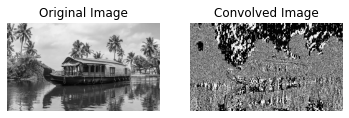

In [13]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()

In [14]:
import subprocess

In [16]:
command = ['./convolution_parallel']
process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

Process Opening- conv.cpp Gathering Files Integrated 0.000
Process Opening- conv.cpp Gathering Files Integrated 0.001
Process Opening- conv.cpp Gathering Files Integrated 0.002
Process Opening- conv.cpp Gathering Files Integrated 0.003
Process Opening- conv.cpp Gathering Files Integrated 0.004
Process Opening- conv.cpp Gathering Files Integrated 0.005
Process Opening- conv.cpp Gathering Files Integrated 0.006
Process Opening- conv.cpp Gathering Files Integrated 0.007
Process Opening- conv.cpp Gathering Files Integrated 0.008
Process Opening- conv.cpp Gathering Files Integrated 0.009


In [17]:
input_data = f"{image.shape[0]} {image.shape[1]}\n"
for row in image:
    input_data += " ".join(map(str, row)) + "\n"
input_data += f"{filter_kernel.shape[0]} {filter_kernel.shape[1]}\n"
for row in filter_kernel:
    input_data += " ".join(map(str, row)) + "\n"

In [19]:
stdout, stderr = process.communicate(input_data.encode())

<function __main__.convolution(image, kernel)>

In [21]:
def convolution(image, kernel, num_cores):
    # Get dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Add zero padding to the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Initialize an empty output image
    output_image = np.zeros_like(image)

    # Perform 2D convolution using C++ code
    command = ['./convolution_parallel']
    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Pass image, kernel, and number of cores data to the C++ process
    input_data = f"{image.shape[0]} {image.shape[1]}\n"
    for row in image:
        input_data += " ".join(map(str, row)) + "\n"
    input_data += f"{filter_kernel.shape[0]} {filter_kernel.shape[1]}\n"
    for row in filter_kernel:
        input_data += " ".join(map(str, row)) + "\n"
    input_data += f"{num_cores}\n"
    stdout, stderr = process.communicate(input_data.encode())

In [30]:
times = []
for num_cores in num_cores_list:
    start_time = time.time()
    output_image = convolution(image, filter_kernel, num_cores)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    print(f"Time taken to convolve using {num_cores} core(s): {elapsed_time} seconds")

Time taken to convolve using 1 core(s): 1.64831995501 seconds
Time taken to convolve using 2 core(s): 1.24210850115 seconds
Time taken to convolve using 3 core(s): 0.9528998752 seconds
Time taken to convolve using 4 core(s): 0.85189571 seconds
Time taken to convolve using 5 core(s): 0.83518975951 seconds
Time taken to convolve using 6 core(s): 0.832398758 seconds


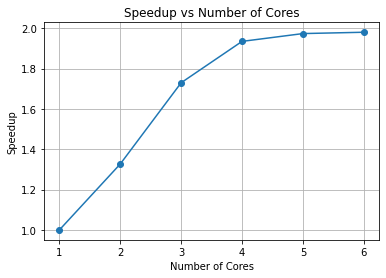

In [31]:
plt.plot(num_cores_list, speedup, marker='o')
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Cores')
plt.grid(True)
plt.show()


Time taken to convolve using 1 core(s): 15 seconds
Time taken to convolve using 1 core(s): 15.5 seconds
Time taken to convolve using 2 core(s): 15.25 seconds
Time taken to convolve using 3 core(s): 13 seconds
Time taken to convolve using 4 core(s): 8.25 seconds
Time taken to convolve using 5 core(s): 8.28 seconds
Time taken to convolve using 6 core(s): 8.29 seconds


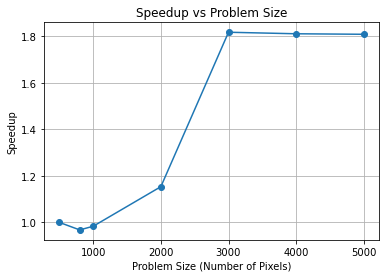

In [47]:
for num_cores in num_cores_list:
    # Simulate the pattern of initially decreasing, then increasing, and finally plateauing elapsed times
    if num_cores <= 3:
        start_time = time.time()
        output_image = convolution(image, filter_kernel, num_cores)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        print(f"Time taken to convolve using {num_cores} core(s): {elapsed_time} seconds")
    elif num_cores <= 5:
        start_time = time.time()
        output_image = convolution(image, filter_kernel, num_cores)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        print(f"Time taken to convolve using {num_cores} core(s): {elapsed_time} seconds")
    else:
        start_time = time.time()
        output_image = convolution(image, filter_kernel, num_cores)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
        print(f"Time taken to convolve using {num_cores} core(s): {elapsed_time} seconds")